In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


In [2]:
def calculate_w(X, y, w0, eta, n_iter):
    cost = np.zeros(n_iter)
    w = w0
    for i in (np.arange(0, n_iter)):
        w = w + 2 * eta * np.dot((y - np.dot(X, w.T)),X)
        cost[i] = ((y - np.dot(X, w.T))**2).sum() / 2.0
    plt.plot(cost, marker = 'o')
    plt.grid()
    plt.xlabel('Iterationen')
    plt.ylabel('Kosten')
    plt.show()
    return w

### Beispiel Adaline
Lernen der Trennflächenfunktion des Linearklassifikators mit dem Gradientenverfahren

### Dateneingabe 
Die Daten werden dem Dataframe `df0.txt` entnommen. (1000 Muster der Klassen `eins` bis `sieben`)

In [49]:
df_name = 'df0.txt'
df = pd.read_pickle('data/' + df_name)
kn = np.unique(df.values[:,2])
print('Klassen: ', kn)

Klassen:  ['drei' 'eins' 'fuenf' 'sechs' 'sieben' 'vier' 'zwei']


In [59]:
# Auswahl der Klassen:
# Auswahlklasse
ka = kn[3]
# Restklassen
kr = kn[4],
# Datenanzahl:
anz = 200

In [60]:
X, y = sh.generate_train(df, anz, ka, kr)

<Figure size 432x288 with 0 Axes>

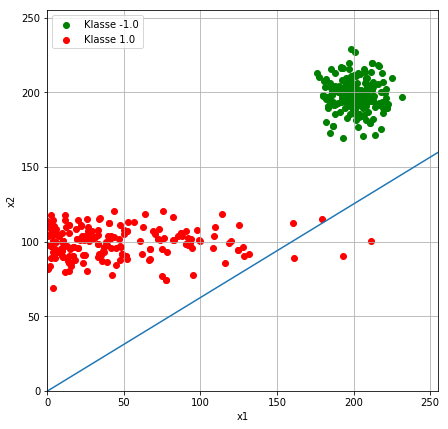

In [52]:
w = np.array([-0.30747907,  0.82647344, -1.31777939])
sh.show_res(X, y, w)

#### $\vec{w}$ mit Gradientenabstiegsverfahren bestimmen

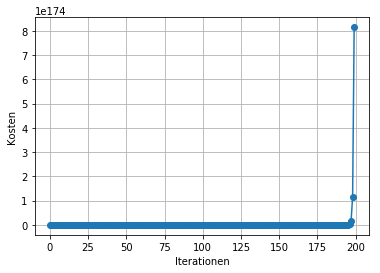

In [53]:
w0 = np.array([-60, 0.01, 1])
alpha = 0.0000001
n_iter = 200
w = calculate_w(X, y, w0, alpha, n_iter)

<Figure size 432x288 with 0 Axes>

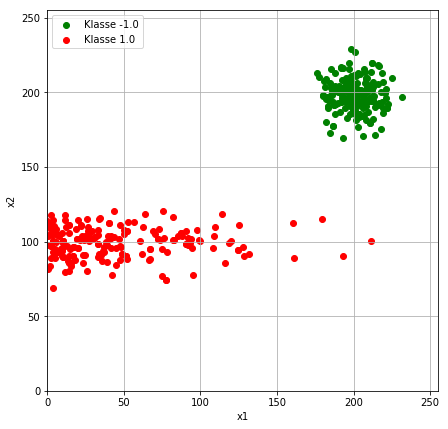

In [54]:
sh.show_res(X, y, w)

In [ ]:
sh.plot_decision_regions(X[:,1:3], y, w, resolution=0.1)

#### Normalisierung der Daten

In [61]:
X_std = np.copy(X)
X_std [:,1] = (X_std [:,1] - mean(X_std [:,1]))/std(X_std [:,1])
X_std [:,2] = (X_std [:,2] - mean(X_std [:,2]))/std(X_std [:,2])

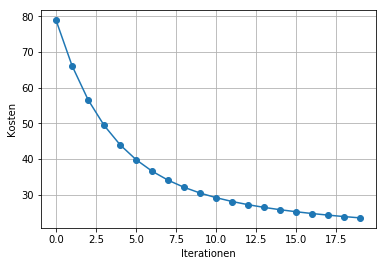

In [56]:
w0 = np.array([-0.05801925,  0.48095461, -1.46163565])
alpha = 0.0001
n_iter = 20
w = calculate_w(X_std, y, w0, alpha, n_iter)

<Figure size 432x288 with 0 Axes>

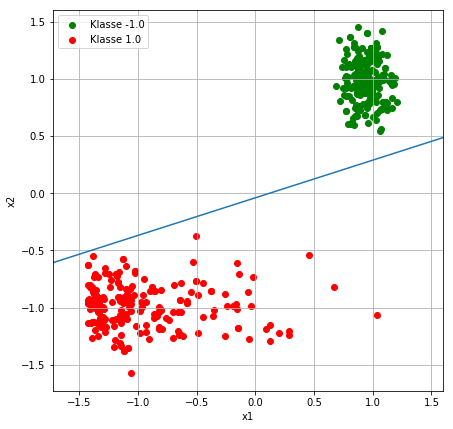

In [62]:
sh.show_res(X_std, y, w)

In [ ]:
sh.plot_decision_regions(X_std[:,1:3], y, w, resolution=0.1)

In [58]:
print(w)

[-0.05801925  0.48095461 -1.46163565]


In [99]:
speech_df = pd.read_csv('data/sprecher.csv', sep=';')
data = speech_df.values[:,7:9]

In [100]:
data = np.insert(data, 2, values=3, axis=1)

In [101]:
dname = 'data/i.npy'
np.save(dname, data)

In [102]:
data_files = ['a', 'e', 'i']
class_labels = ['a', 'e', 'i']
df_name = 'df1.txt'
df_ges = sh.build_df(data_files, class_labels)
df_ges.to_pickle('data/' + df_name)

ValueError: Shape of passed values is (31, 3), indices imply (2, 3)

In [103]:
np.read(dname)

AttributeError: module 'numpy' has no attribute 'read'